# ABC Analysis in Python

## What is ABC Analysis?

ABC Analysis is a commonly used practice for inventory grouping that divides inventory into categories based on two factors, the cost per unit and the quantity held in stock. ABC Analysis divides the inventory into three major groups, which allows different inventory management techniques to be applied to different segments of the inventory in order to increase the revenue and decrease the cost.

Each category A, B, and C consists of part of the total quantity of the items and represents a part of the total value of the items in the warehouse.

**Category A** items generally represent approximately 15%-20% of an overall inventory by item, but represent 80% of value of an inventory. Items in this categpry are goods which annual consumption value is the highest.

**Category B** items represent 30%-35% of inventory items by item type, and about 15% of the value. The items in this category are goods with medium consumption value.

**Category C** items represent 50% of actual items but only 5% of the inventory value. The items in this category are goods with the lowest consumption value.

## ABC Analysis Steps

Step 1: Calculate the annual spend for all the parts by multiplying the unit cost with the annual unit demand   
Step 2: Sort inventory in decreasing order of annual spend  
Step 3: Calculate the cumulative annual spend and the percent spend  
Step 4: Divide the inventory into classes  
Step 5: Analyze the classes and make appropriate decisions

## ABC Analysis in action

In [16]:
import pandas as pd
import pandasql as pdsql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pysql = lambda q: pdsql.sqldf(q, globals())

For the purpose of understanding ABC Analysis, I am going to run through an example with the step by step process. In order to do so, I used the [Historical Sales and Active Inventory](https://www.kaggle.com/flenderson/sales-analysis) Kaggle dataset. 

In [17]:
data = pd.read_csv('./SalesKaggle3.csv')

In [18]:
def ABC_segmentation(perc):
    '''
    Creates the 3 classes A, B, and C
    '''
    if perc > 0 and perc < 0.6:
        return 'A'
    elif perc >= 0.6 and perc < 0.85:
        return 'B'
    elif perc >= 0.85:
        return 'C'

In [19]:
# take a subset of the data, we need to use the price and the quantity of each item
data_sub = data[['SKU_number','PriceReg','ItemCount','File_Type']][(data['File_Type'] == 'Historical')]
# create the column of the additive cost per SKU
data_sub['AddCost'] = data_sub['PriceReg'] * data_sub['ItemCount']
# order by cumulative cost
data_sub = data_sub.sort_values(by=['AddCost'], ascending=False)
# create the column of the running CumCost of the cumulative cost per SKU
data_sub['RunCumCost'] = data_sub['AddCost'].cumsum()
# create the column of the total sum
data_sub['TotSum'] = data_sub['AddCost'].sum()
# create the column of the running percentage
data_sub['RunPerc'] =  data_sub['RunCumCost']/data_sub['TotSum']
# create the column of the class
data_sub['Class'] = data_sub['RunPerc'].apply(ABC_segmentation)

In [20]:
data_sub.head()

,SKU_number,PriceReg,ItemCount,File_Type,AddCost,RunCumCost,TotSum,RunPerc,Class
685,145889,244.6,851,Historical,208154.6,208154.6,3.426320e+08,0.000608,A
601,435034,281.8,616,Historical,173588.8,381743.4,3.426320e+08,0.001114,A
75056,538479,2645.3,49,Historical,129619.7,511363.1,3.426320e+08,0.001492,A
5752,212633,235.6,521,Historical,122747.6,634110.7,3.426320e+08,0.001851,A
3758,212480,208.8,579,Historical,120895.2,755005.9,3.426320e+08,0.002204,A


In [21]:
# total SKUs for each class
data_sub.Class.value_counts()

C    37413
B    22288
A    16295
Name: Class, dtype: int64

In [22]:
# total cost per class
print 'Cost of Class A', data_sub[data_sub.Class == 'A']['AddCost'].sum() 
print 'Cost of Class B', data_sub[data_sub.Class == 'B']['AddCost'].sum() 
print 'Cost of Class C', data_sub[data_sub.Class == 'C']['AddCost'].sum() 

Cost of Class A 205577451.4
Cost of Class B 85658215.25999999
Cost of Class C 51396361.129999995


In [23]:
# percent of total cost per class
print 'Percent of Cost of Class A', data_sub[data_sub.Class == 'A']['AddCost'].sum()/data_sub['AddCost'].sum()
print 'Percent of Cost of Class B', data_sub[data_sub.Class == 'B']['AddCost'].sum()/data_sub['AddCost'].sum()
print 'Percent of Cost of Class C', data_sub[data_sub.Class == 'C']['AddCost'].sum()/data_sub['AddCost'].sum() 

Percent of Cost of Class A 0.5999948479013728
Percent of Cost of Class B 0.2500006079773141
Percent of Cost of Class C 0.15000454412131298


### Summarize Results

The following table includes summary results of the three different classes.

| Class | Total SKUs | Total Cost ($) | Quantity Percentage | Cost Percentage | 
|----|-------|------|-------|
| A | 16295 | 205577451 | 21% | 60% |
| B | 22288 | 85658215 | 30% | 25% |
| C | 37413 | 51396361 | 49% | 15% |
| Total | 75996 | 342632027 | 100% | 100% |

**Category A** items represent 21% of an overall inventory by item and represent 60% of value of an inventory. **Category B** items represent 30% of inventory items by item, and about 25% of the value. Finally, 
**Category C** items represent 49% of actual items but only 15% of the inventory value. 

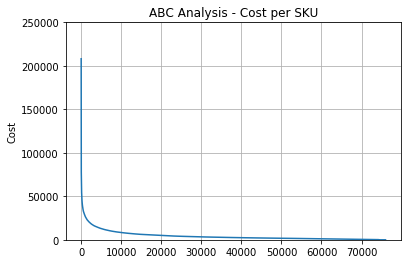

In [27]:
performance = data_sub['AddCost'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Cost')
plt.title('ABC Analysis - Cost per SKU')
plt.grid(True)
plt.ylim((0,250000))
plt.show()

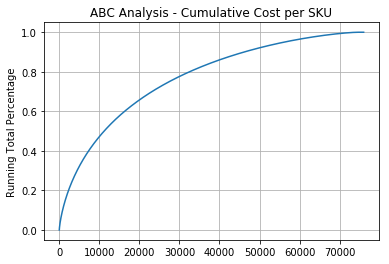

In [25]:
performance = data_sub['RunPerc'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Cost per SKU')
plt.grid(True)
plt.show()

## References

https://theaccessbuddy.wordpress.com/2014/11/19/perform-abc-analysis-pareto-analysis-using-the-dsum-function-part-1-of-2/

https://www.purchasing-procurement-center.com/abc-analysis.html

https://www.lokad.com/abc-analysis-(inventory)-definition